In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

## Pré processamento de dados

In [100]:
import sklearn.preprocessing as pp
D = ds.load_iris()
X = D.data
y = D.target
X.shape

(150, 4)

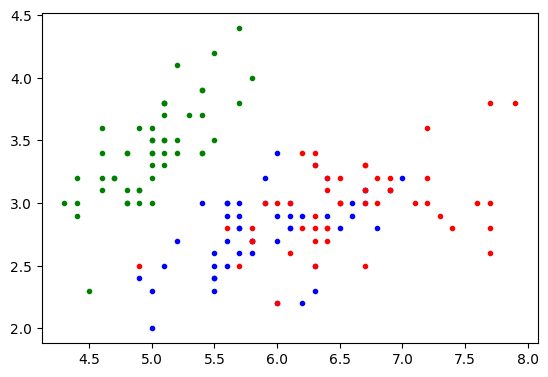

In [101]:
plt.plot(X[y==0, 0], X[y==0, 1], 'g.')
plt.plot(X[y==1, 0], X[y==1, 1], 'b.')
plt.plot(X[y==2, 0], X[y==2, 1], 'r.')
plt.axis('scaled')
plt.show()

In [102]:
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


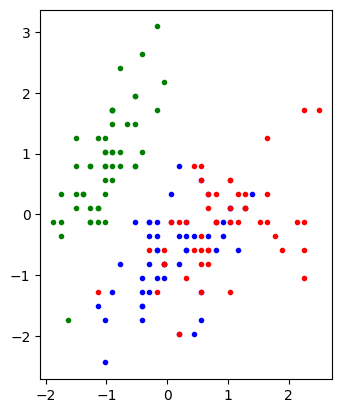

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


In [103]:
sc = pp.StandardScaler().fit(X)
Xn = sc.transform(X)
plt.plot(Xn[y==0, 0], Xn[y==0, 1], 'g.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], 'b.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], 'r.')
plt.axis('scaled')
plt.show()
print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

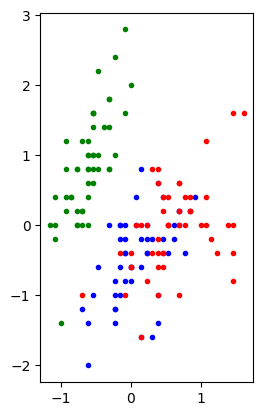

[ 0.03333333  0.11466667 -0.16914286 -0.06711111]
[0.63484715 0.86882194 0.50268688 0.50646175]


In [104]:
rs = pp.RobustScaler().fit(X)
Xn = rs.transform(X)
plt.plot(Xn[y==0, 0], Xn[y==0, 1], 'g.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], 'b.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], 'r.')
plt.axis('scaled')
plt.show()
print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

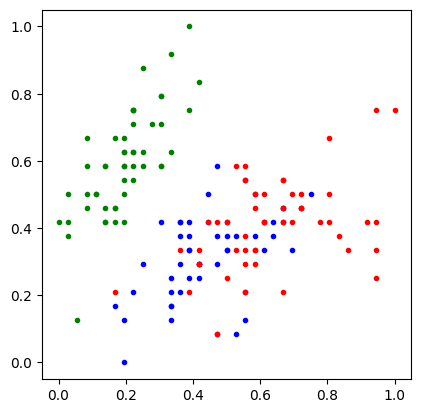

[0.4287037  0.44055556 0.46745763 0.45805556]
[0.22925036 0.18100457 0.29820408 0.31653859]


In [105]:
mm = pp.MinMaxScaler().fit(X)
Xn = mm.transform(X)
plt.plot(Xn[y==0, 0], Xn[y==0, 1], 'g.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], 'b.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], 'r.')
plt.axis('scaled')
plt.show()
print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

## normalizer

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


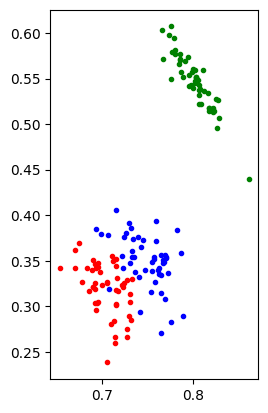

In [106]:
nn = pp.Normalizer().fit(X)
Xn = nn.transform(X)
nX = np.sqrt(np.sum(Xn**2, axis=1))
print(nX[:10])
plt.plot(Xn[y==0, 0], Xn[y==0, 1], 'g.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], 'b.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], 'r.')
plt.axis('scaled')
plt.show()

(-1.0, 1.0, -1.0, 1.0)

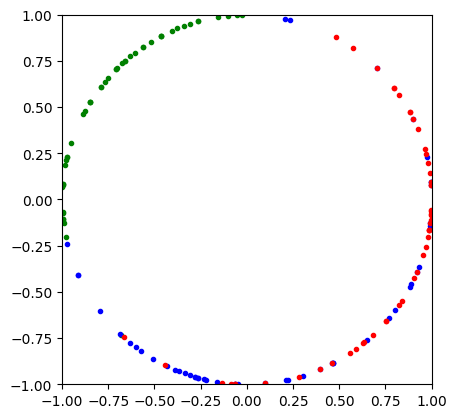

In [107]:
X2 = X[:,:2]
sc = pp.StandardScaler().fit(X2)
#sc = pp.MinMaxScaler().fit(X2)
X2 = sc.transform(X2)
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)
plt.plot(Xn[y==0, 0], Xn[y==0, 1], 'g.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], 'b.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], 'r.')
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])

(-1.0819712230969838,
 1.0955633366306534,
 -1.0925387304201586,
 1.0925006222785765,
 -1.0,
 1.0)

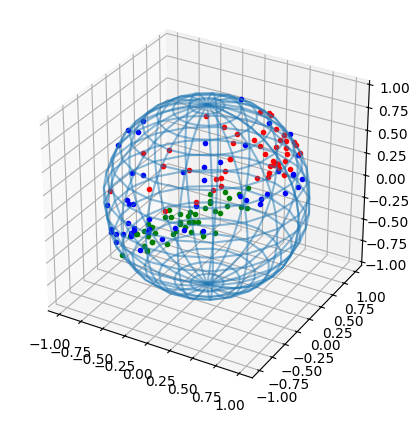

In [108]:
from mpl_toolkits.mplot3d import Axes3D

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)

f1 = plt.figure(figsize=(5,5))
ax = f1.add_subplot(111, projection='3d') #3D
ax.plot_wireframe(gx, gy, gz, alpha=.5,)


X2 = X[:, :3]
sc = pp.StandardScaler().fit(X2)
#sc = pp.MinMaxScaler().fit(X2)
X2 = sc.transform(X2)
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)
ax.plot(Xn[y == 0, 0], Xn[y == 0, 1], Xn[y == 0, 2], 'g.')
ax.plot(Xn[y == 1, 0], Xn[y == 1, 1], Xn[y == 1, 2], 'b.')
ax.plot(Xn[y == 2, 0], Xn[y == 2, 1], Xn[y == 2, 2], 'r.')
ax.axis('scaled')

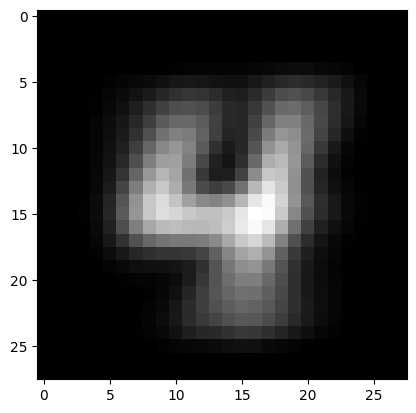

In [109]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
"""
X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]
"""

X4 = X[:, y==4]
a = np.reshape(X4[:,13], (28,28))
plt.imshow(255-a, cmap= 'binary')
a = np.reshape(np.mean(X4, axis=1), (28,28))
plt.imshow(255-a, cmap= 'binary')

In [110]:
X = X * 1.0
X.dtype

dtype('float64')

## Matrizes de correlação

(-6.8924634217120095, 7.560867734301141, -8.86080463618471, 8.622971704457354)

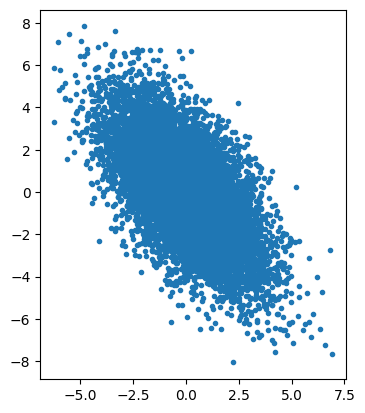

In [111]:
x = np.random.randn(2, 10000)
A = np.random.randn(2,2)*2
x2 = np.dot(A,x)
plt.plot(x2[0,:], x2[1,:],'.')
plt.axis('scaled')

[[ 3.13630004 -2.36376151]
 [-2.36376151  4.73738001]]


(-20.67739026513603,
 22.682603202903422,
 -26.582413908554134,
 25.868915113372065)

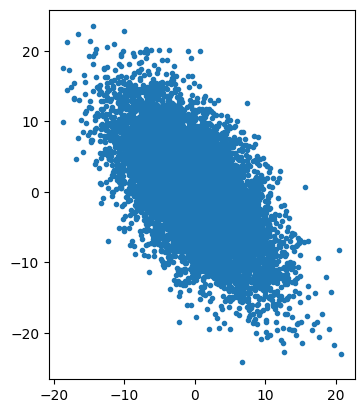

In [112]:
print(np.cov(x2))
x3 = 3*x2
plt.plot(x3[0,:], x3[1,:],'.')
plt.axis('scaled')

In [113]:
print(np.cov(x2))
print(np.cov(x3))
print(np.corrcoef(x2))
print(np.corrcoef(x3))

[[ 3.13630004 -2.36376151]
 [-2.36376151  4.73738001]]
[[ 28.22670038 -21.27385363]
 [-21.27385363  42.63642011]]
[[ 1.         -0.61323332]
 [-0.61323332  1.        ]]
[[ 1.         -0.61323332]
 [-0.61323332  1.        ]]


In [114]:
C0 = np.cov(X[:, y==0])
C1 = np.cov(X[:, y==1])
C2 = np.cov(X[:, y==2])
C3 = np.cov(X[:, y==3])
C4 = np.cov(X[:, y==4])
C5 = np.cov(X[:, y==5])
C6 = np.cov(X[:, y==6])
C7 = np.cov(X[:, y==7])
C8 = np.cov(X[:, y==8])
C9 = np.cov(X[:, y==9])

S0 = np.corrcoef(X[:, y==0])
S1 = np.corrcoef(X[:, y==1])
S2 = np.corrcoef(X[:, y==2])
S3 = np.corrcoef(X[:, y==3])
S4 = np.corrcoef(X[:, y==4])
S5 = np.corrcoef(X[:, y==5])
S6 = np.corrcoef(X[:, y==6])
S7 = np.corrcoef(X[:, y==7])
S8 = np.corrcoef(X[:, y==8])
S9 = np.corrcoef(X[:, y==9])


C:\Users\dadum\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dadum\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(-0.5, 783.5, 783.5, -0.5)

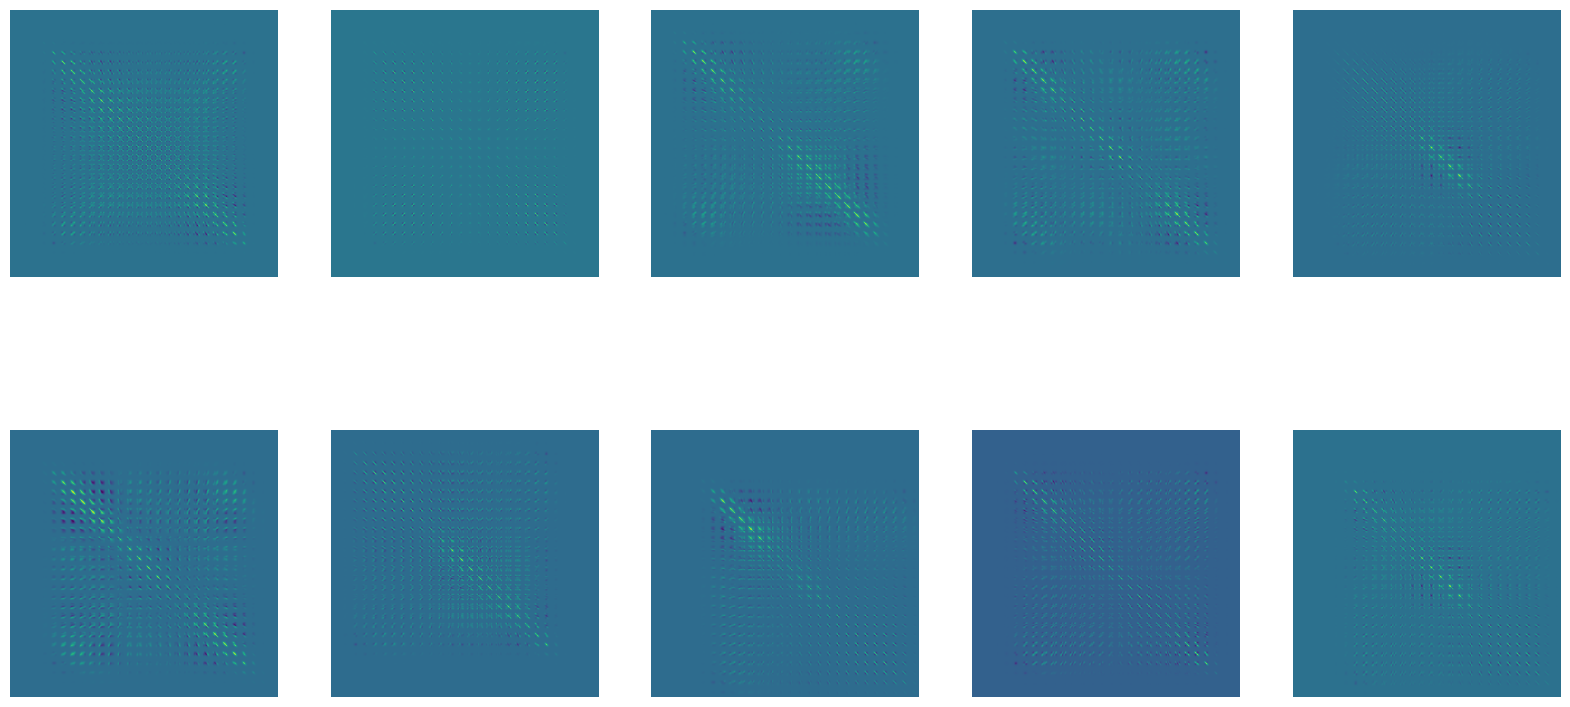

In [115]:
plt.figure(figsize=(20,10))
plt.subplot(251)
plt.imshow(C0)
plt.axis('off')
plt.subplot(252)
plt.imshow(C1)
plt.axis('off')
plt.subplot(253)
plt.imshow(C2)
plt.axis('off')
plt.subplot(254)
plt.imshow(C3)
plt.axis('off')
plt.subplot(255)
plt.imshow(C4)
plt.axis('off')
plt.subplot(256)
plt.imshow(C5)
plt.axis('off')
plt.subplot(257)
plt.imshow(C6)
plt.axis('off')
plt.subplot(258)
plt.imshow(C7)
plt.axis('off')
plt.subplot(259)
plt.imshow(C8)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(C9)
plt.axis('off')

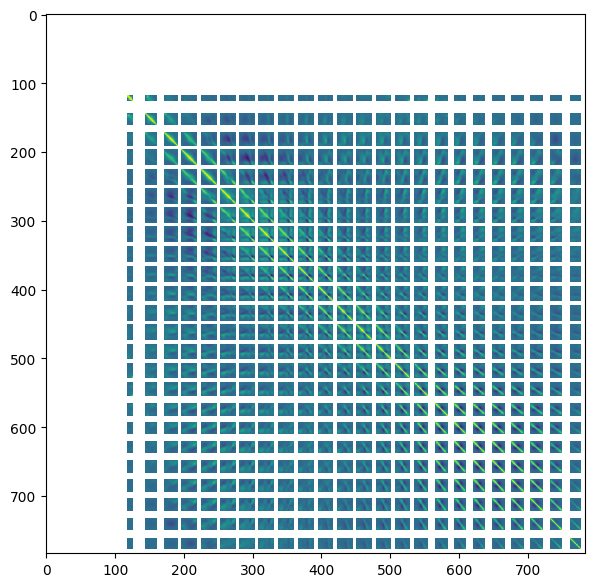

In [116]:
plt.figure(figsize=(7,7))
plt.imshow(S7)

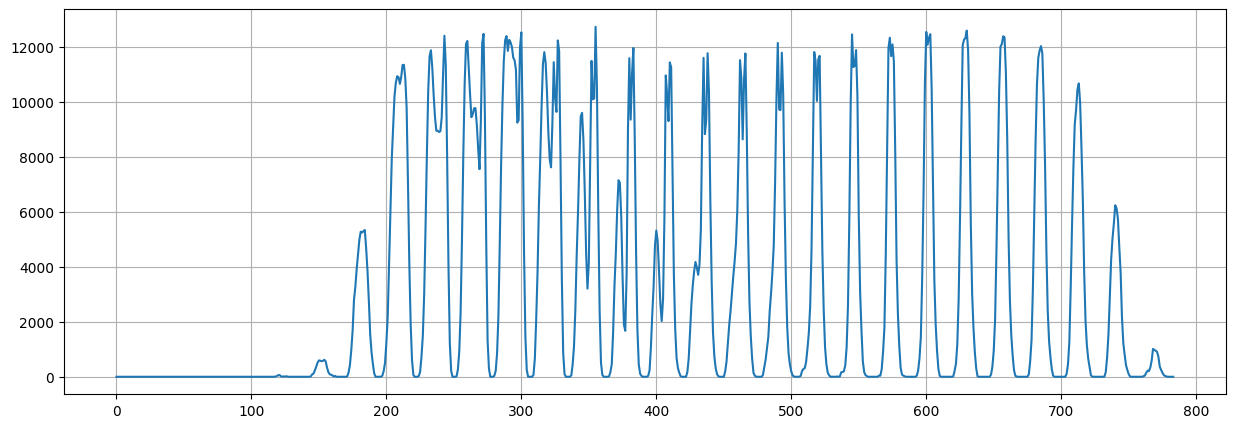

In [117]:
v = np.diag(C7)
plt.figure(figsize=(15,5))
plt.plot(v)
plt.grid(True)

(-0.5, 27.5, 27.5, -0.5)

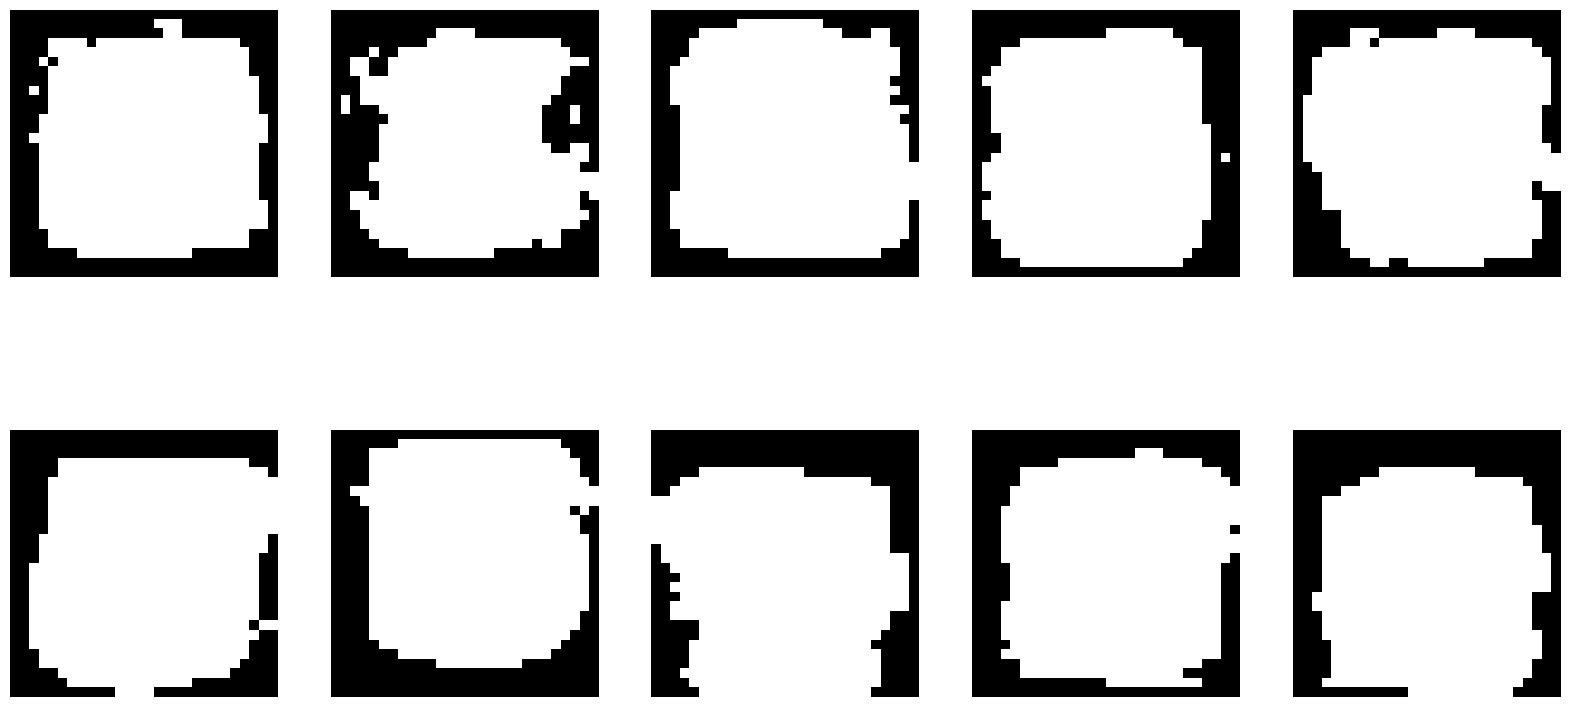

In [118]:
#z7 = (v == 0) * 1
z0 = (np.diag(C0)!=0).reshape((28,28))
z1 = (np.diag(C1)!=0).reshape((28,28))
z2 = (np.diag(C2)!=0).reshape((28,28))
z3 = (np.diag(C3)!=0).reshape((28,28))
z4 = (np.diag(C4)!=0).reshape((28,28))
z5 = (np.diag(C5)!=0).reshape((28,28))
z6 = (np.diag(C6)!=0).reshape((28,28))
z7 = (np.diag(C7)!=0).reshape((28,28))
z8 = (np.diag(C8)!=0).reshape((28,28))
z9 = (np.diag(C9)!=0).reshape((28,28))

plt.figure(figsize=(20,10))
plt.subplot(251)
plt.imshow(z0, cmap='gray')
plt.axis('off')
plt.subplot(252)
plt.imshow(z1, cmap='gray')
plt.axis('off')
plt.subplot(253)
plt.imshow(z2, cmap='gray')
plt.axis('off')
plt.subplot(254)
plt.imshow(z3, cmap='gray')
plt.axis('off')
plt.subplot(255)
plt.imshow(z4, cmap='gray')
plt.axis('off')
plt.subplot(256)
plt.imshow(z5, cmap='gray')
plt.axis('off')
plt.subplot(257)
plt.imshow(z6, cmap='gray')
plt.axis('off')
plt.subplot(258)
plt.imshow(z7, cmap='gray')
plt.axis('off')
plt.subplot(259)
plt.imshow(z8, cmap='gray')
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(z9, cmap='gray')
plt.axis('off')

In [119]:
sc = pp.StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T

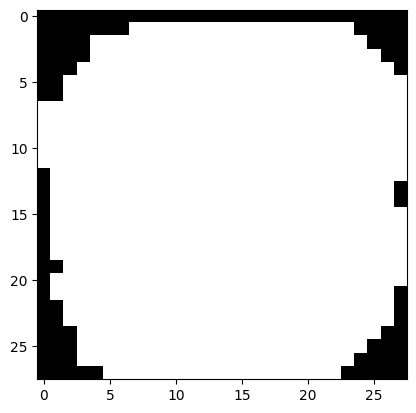

In [120]:
v = np.var(X2, axis=1)
plt.imshow(v.reshape(28,28), cmap='gray')

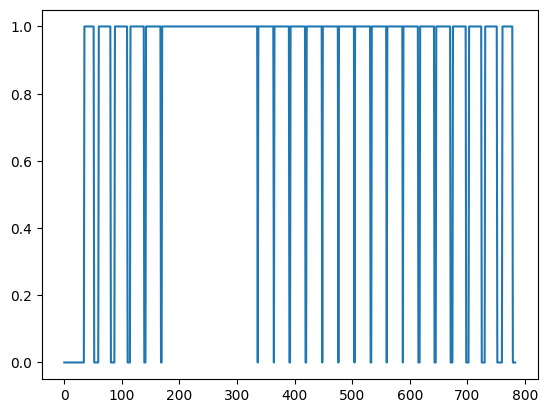

In [121]:
plt.plot(v)

## Anallise de componentes principais (PCA)

In [122]:
import scipy.linalg as la
Cx = np.cov(X)
u, W = la.eig(Cx)
u = u.real
W = W.real
print(u.shape)
print(W.shape)

(784,)
(784, 784)


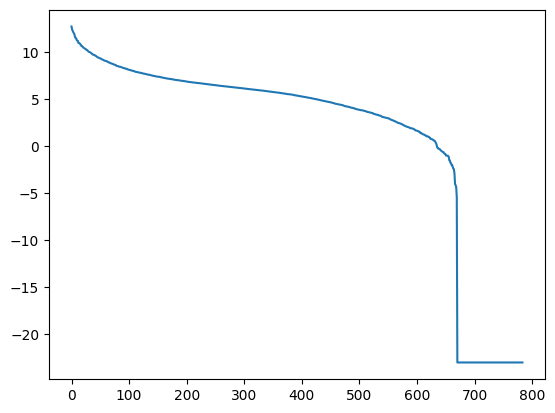

In [123]:
idx = np.argsort(-u)
u = u[idx]
W = W[:,idx]
plt.plot(np.log(u+1e-10)) 

In [124]:
un = u/np.sum(u)
L = np.cumsum(un)
print(np.sum(L<=0.99))

m = np.mean(X, axis=1)[:,np.newaxis]
Xn = X-m
W2 = W[:,:300]
Xp = np.dot(W2.T,Xn)
Xr = np.dot(W2, Xp) + m

Xp.shape

326


(300, 15000)

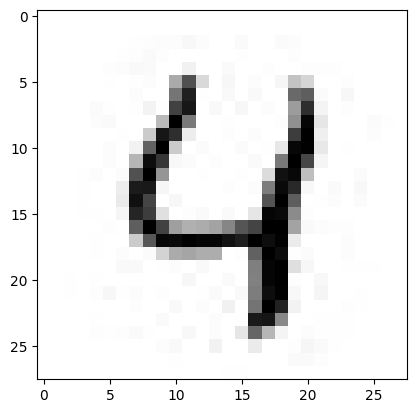

In [125]:
x = Xr[:,7000].reshape(28,28)
#x = x-x.min()
x = np.clip(x, 0, 255)
#x = x/x.max()*255
plt.imshow(x.astype('uint8'), cmap='binary')

In [126]:
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]
print(X1.shape, X2.shape)

(784, 10000) (784, 5000)


In [127]:
Cx = np.cov(X1)
u, V = la.eig(Cx)
u = u.real
V = V.real

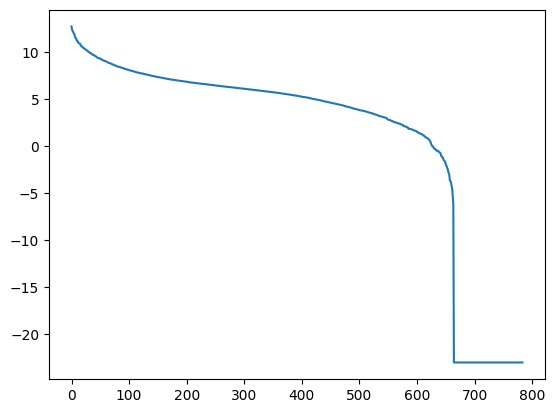

In [128]:
idx = np.argsort(-u)
u = u[idx]
V = V[:,idx]
plt.plot(np.log(u+1e-10)) 

In [129]:
print(np.sum(u>=1e-6))

664


In [130]:
W = V[:,:664]
m = np.mean(X1, axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)

In [131]:
s = np.std(X1p, axis=1)
print(s[:10])
print(np.sqrt(u[:10]))

Xtmp = (X1p.T/s).T
print(np.std(Xtmp, axis=1))

[586.00518804 493.42306958 461.38830872 434.07789728 405.52569402
 387.78533176 335.16926737 317.54195021 310.15556184 282.8773864 ]


[586.03449049 493.44774259 461.41137987 434.09960281 405.54597182
 387.80472248 335.18602709 317.55782849 310.17107078 282.89153133]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [132]:
s = np.std(X1p, axis=1)
S = np.diag(1/s)
X1p = np.dot(S, X1p)
print(np.std(X1p, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [133]:
X2n = X2-m
X2p = np.dot(S, np.dot(W.T,X2n))

7.140000000000001


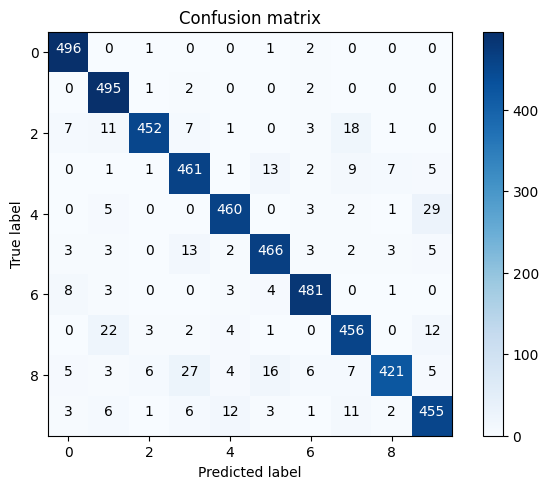

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
CM =  confusion_matrix(y2, y2e)
plot_confusion_matrix(CM)
print(np.sum(y2 != y2e)/5000*100)

5.86


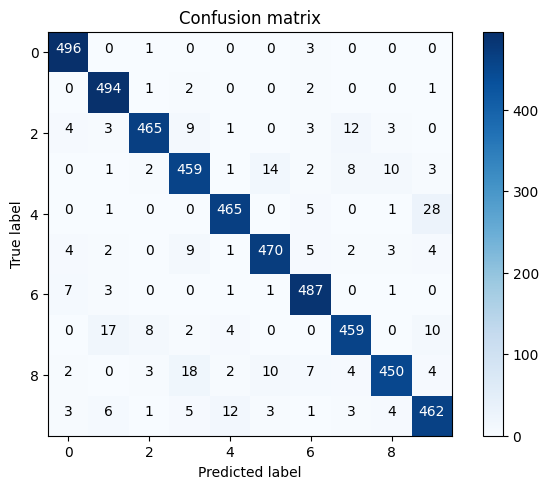

In [135]:
W = V[:,:40]
m = np.mean(X1, axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)

X2n = X2-m
X2p = np.dot(W.T,X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM =  confusion_matrix(y2, y2e)
plot_confusion_matrix(CM)
print(np.sum(y2 != y2e)/5000*100)

5.88


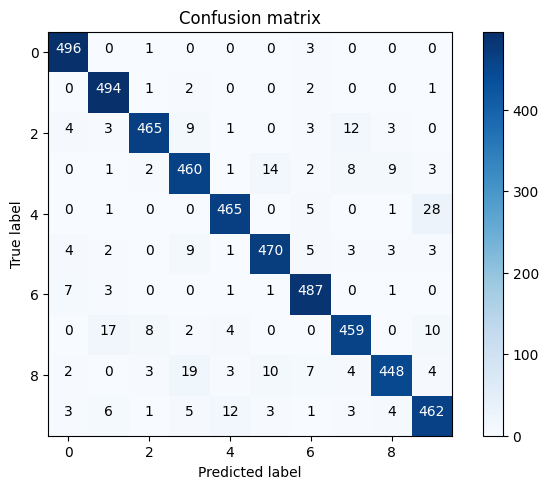

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40).fit(X1.T)
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM =  confusion_matrix(y2, y2e)
plot_confusion_matrix(CM)
print(np.sum(y2 != y2e)/5000*100)


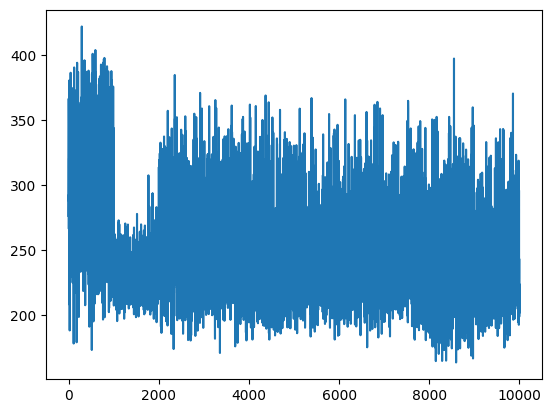

In [137]:
plt.plot(np.std(X1p, axis=0))

## Analise em Discriminantes Lineares (LDA)

In [138]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

Xa = X1[:,y1==0]
Xb = X1[:,y1==1]

X01 = np.hstack((Xa, Xb))
y1 = np.hstack((np.zeros(1000), np.ones(1000)))

Xa = X2[:,y2==0]
Xb = X2[:,y2==1]

X01t = np.hstack((Xa, Xb))
y2 = np.hstack((np.zeros(500), np.ones(500)))

In [139]:
pca = PCA(n_components=1-1e-15, whiten=True).fit(X01.T)
X01p = pca.transform(X01.T).T
print(X01p.shape)

(500, 2000)


In [140]:
m0 = np.mean(X01p[:, y1==0], axis=1)
m1 = np.mean(X01p[:, y1==1], axis=1)
C0 = np.cov(X01p[:, y1==0])
C1 = np.cov(X01p[:, y1==1])
w = np.dot(la.pinv(C0+C1), m0-m1)
w = w/np.sqrt(np.sum(w**2))

1.6653345369377348e-16


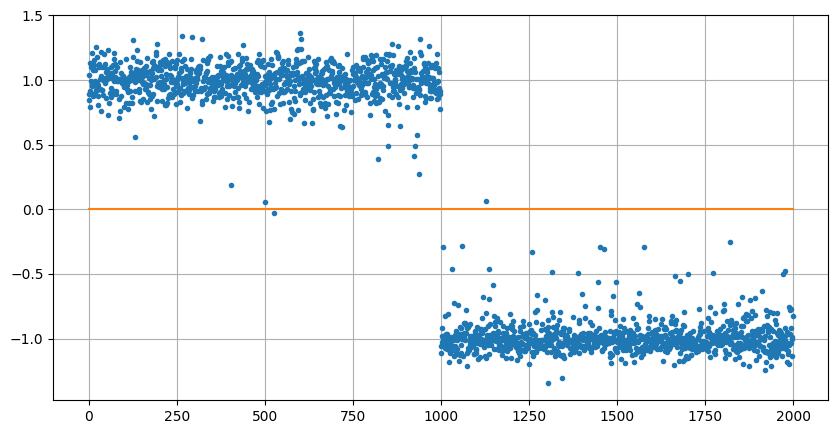

In [141]:
X01q = np.dot(w.T, X01p)
l = (np.dot(w, m0) + np.dot(w, m1))/2
print(l)
plt.figure(figsize=(10,5))
plt.plot(X01q, '.')
plt.plot([0,2000], [l,l])
plt.grid(True)

In [142]:
y1e = (X01q < 0)*1
idx = np.argwhere(y1 != y1e).squeeze()
print(idx)

[ 527 1127]


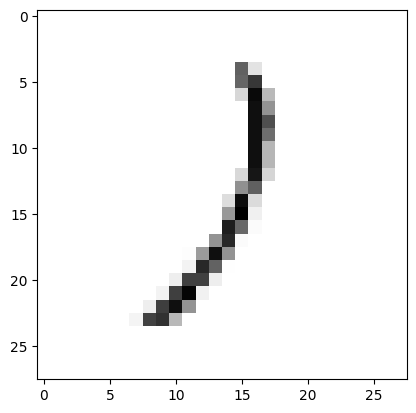

In [143]:
z = X01[:,1127].reshape((28,28))
plt.imshow(z, cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

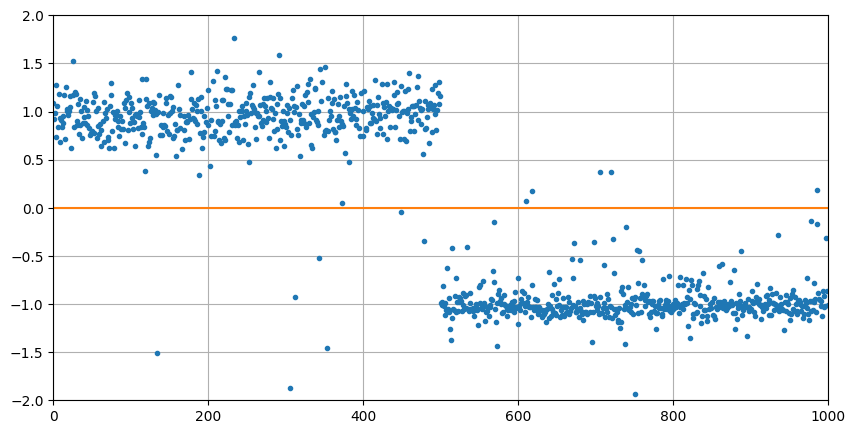

In [144]:
X01tp = pca.transform(X01t.T).T
X01tq = np.dot(w.T, X01tp)
plt.figure(figsize=(10,5))
plt.plot(X01tq, '.')
plt.plot([0,1000], [l,l])
plt.grid(True)
plt.axis([0,1000,-2,2])

In [145]:
y2e = (X01tq < 0)*1
idx = np.argwhere(y2 != y2e).squeeze()
print(idx)

[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


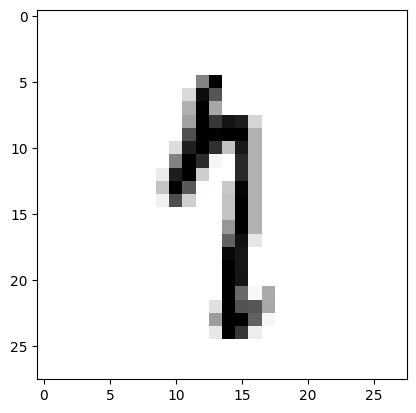

In [146]:
z = X01t[:,985].reshape((28,28))
plt.imshow(z, cmap='binary')

## LDA 5 classes

In [147]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

idx = (y1==0) | (y1==1) | (y1==2) | (y1==3) | (y1==4)
X1 = X1[:,idx]
y1 = y1[idx]

idx = (y2==0) | (y2==1) | (y2==2) | (y2==3) | (y2==4)
X2 = X2[:,idx]
y2 = y2[idx]

In [148]:
pca = PCA(n_components=1-1e-15, whiten=True).fit(X1.T)
X1 = pca.transform(X1.T).T
print(X1.shape)

(604, 5000)


In [149]:
m0 = np.mean(X1[:, y1==0], axis=1)[:,np.newaxis]
S0 = np.dot(m0, m0.T)
m1 = np.mean(X1[:, y1==1], axis=1)[:,np.newaxis]
S1 = np.dot(m1, m1.T)
m2 = np.mean(X1[:, y1==2], axis=1)[:,np.newaxis]
S2 = np.dot(m2, m2.T)
m3 = np.mean(X1[:, y1==3], axis=1)[:,np.newaxis]
S3 = np.dot(m3, m3.T)
m4 = np.mean(X1[:, y1==4], axis=1)[:,np.newaxis]
S4 = np.dot(m4, m4.T)

S = S1+S2+S3+S4

In [150]:
C0 = np.cov(X1[:,y1==0])
C1 = np.cov(X1[:,y1==1])
C2 = np.cov(X1[:,y1==2])
C3 = np.cov(X1[:,y1==3])
C4 = np.cov(X1[:,y1==4])

C = C0+C1+C2+C3+C4

In [151]:
v, V = la.eig(np.dot(la.pinv(C), S))
v = v.real
idx = np.argsort(-v)
V = V.real
V = V[:,idx]
W = V[:,:4]

(4, 5000)


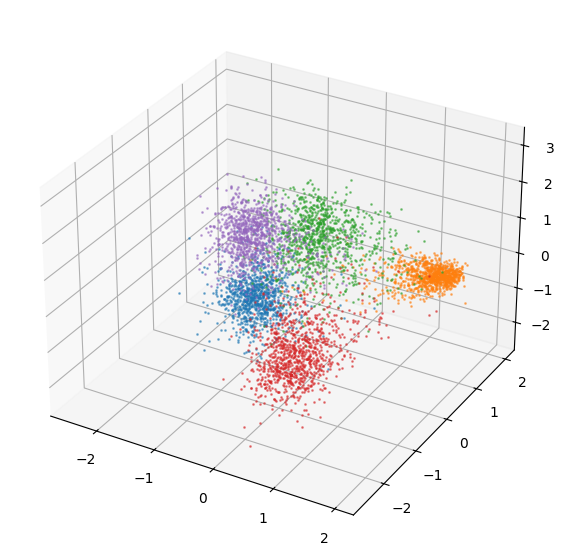

In [152]:
f1 = plt.figure(figsize=(7,7))
ax = f1.add_subplot(111, projection='3d') #3D

X1p = np.dot(W.T, X1)
print(X1p.shape)
ax.plot(X1p[0, y1 == 0], X1p[1, y1 == 0], X1p[2, y1 == 0], '.', ms = 2, alpha=.5)
ax.plot(X1p[0, y1 == 1], X1p[1, y1 == 1], X1p[2, y1 == 1], '.', ms = 2, alpha=.5)
ax.plot(X1p[0, y1 == 2], X1p[1, y1 == 2], X1p[2, y1 == 2], '.', ms = 2, alpha=.5)
ax.plot(X1p[0, y1 == 3], X1p[1, y1 == 3], X1p[2, y1 == 3], '.', ms = 2, alpha=.5)
ax.plot(X1p[0, y1 == 4], X1p[1, y1 == 4], X1p[2, y1 == 4], '.', ms = 2, alpha=.5)


knn: 813 16.259999999999998


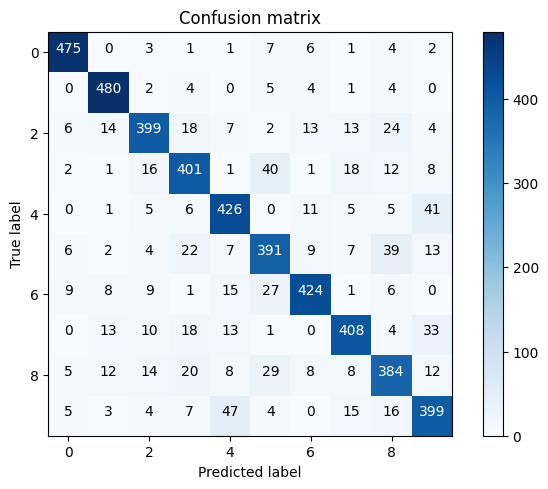

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1].T
y1 = y[f1]
X2 = X[:,f2].T
y2 = y[f2]

pca = PCA(n_components=1-1e-15).fit(X1)
X1a = pca.transform(X1)
X2a = pca.transform(X2)

lda = LinearDiscriminantAnalysis().fit(X1a, y1)
X1b = lda.transform(X1a)
X2b = lda.transform(X2a)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1b, y1)
y2e = knn.predict(X2b)
CM = confusion_matrix(y2, y2e)
print('knn:', np.sum(y2 != y2e), np.sum(y2 != y2e) / y2.shape[0]*100)
plot_confusion_matrix(CM)

knn: 943 18.86


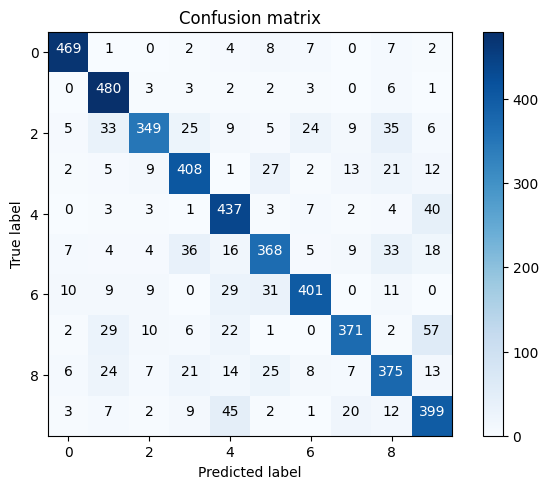

In [154]:
y2e = lda.predict(X2a)
CM = confusion_matrix(y2, y2e)
print('knn:', np.sum(y2 != y2e), np.sum(y2 != y2e) / y2.shape[0]*100)
plot_confusion_matrix(CM)

In [155]:
print(X1a.shape)
print(X1b.shape)

(10000, 664)
(10000, 9)
